In [75]:
from sklearn import svm 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [76]:
df=pd.read_csv('area.csv')
df.columns

Index(['Area', 'Perimeter', 'Eccentricity', 'Solidity', 'Mean', 'Std',
       'Skewness', 'Kurtosis', 'Grade'],
      dtype='object')

In [77]:
print("display na values")
df.isna().sum(axis=0)

display na values


Area            0
Perimeter       0
Eccentricity    0
Solidity        0
Mean            0
Std             0
Skewness        0
Kurtosis        0
Grade           0
dtype: int64

In [78]:
train_dataset,temp_test_dataset=train_test_split(df,test_size=.2)
print(train_dataset.shape)
print(temp_test_dataset.shape)

(270, 9)
(68, 9)


In [79]:
test_dataset,valid_dataset=train_test_split(temp_test_dataset,test_size=.5)
print(valid_dataset.shape)

(34, 9)


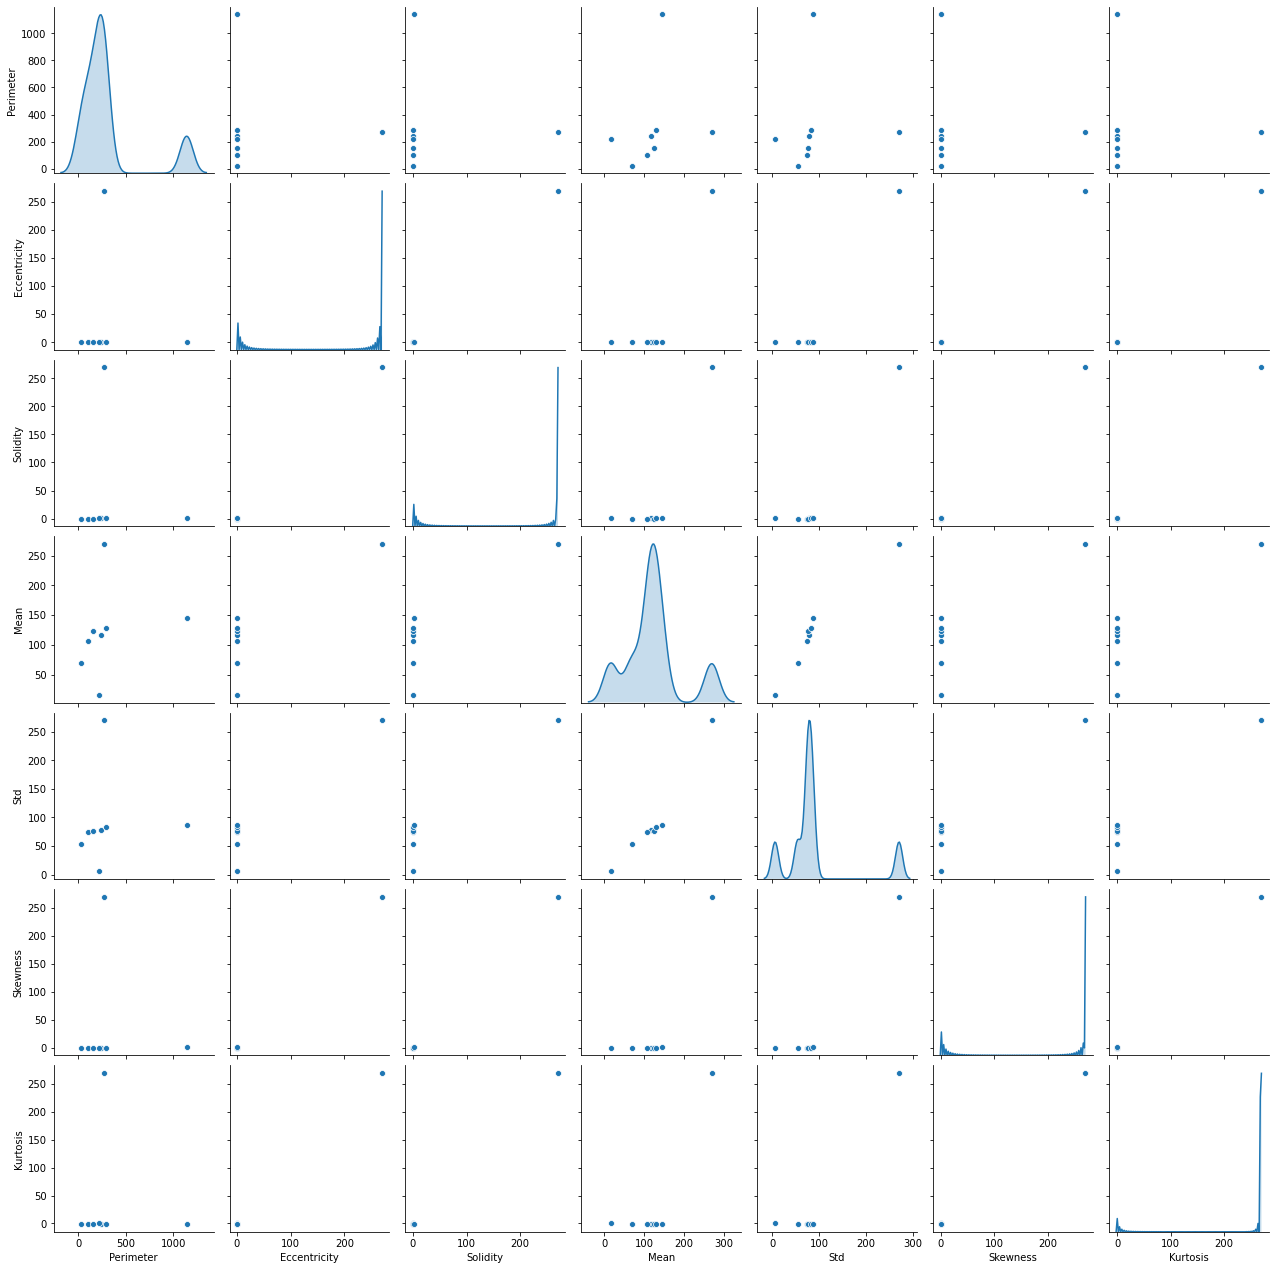

In [91]:
train_stats=train_dataset.describe()

sns.pairplot(train_stats[train_stats.columns],diag_kind="kde")

In [100]:
train_stats=train_dataset.describe()
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Perimeter,270.0,239.990979,218.847130,22.449747,97.614223,155.331475,286.587572,1140.267027
Eccentricity,270.0,0.942164,0.056632,0.639417,0.920239,0.948599,0.990022,0.999740
Solidity,270.0,0.155258,0.232007,0.002995,0.006084,0.021688,0.266777,0.969363
Mean,270.0,117.098264,15.685699,68.592490,106.682665,123.971759,128.733076,145.616852
Std,270.0,77.566570,5.718444,53.624850,74.163847,76.534556,82.937977,85.980096
Skewness,270.0,0.123115,0.183541,-0.047061,-0.006993,0.028010,0.215319,0.829768
Kurtosis,270.0,-1.241756,0.064166,-1.332574,-1.293348,-1.230088,-1.216171,-0.812477


In [102]:

train_labels=train_dataset.pop('Area')


KeyError: 'Area'

In [86]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)
normed_valid_data=norm(valid_dataset)
normed_train_data.head(10)

KeyError: 'mean'

In [87]:
model=svm.SVC(C=1,kernel='linear',)
model.fit(normed_train_data,train_labels)
y_predit=model.predict(normed_test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [88]:
example_batch=normed_test_data[:10]
example_result=model.predict(example_batch)
print('predicted values:')
example_result

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [89]:
from sklearn import metrics
y_pred=model.predict(normed_train_data)
print("accuracy:",metrics.accuracy_score(train_labels,y_pred))

accuracy: 0.3037037037037037


In [90]:
y_pred=model.predict(normed_valid_data)
print("accuracy:",metrics.accuracy_score(valid_labels,y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').